В этом соревновании вам предоставляется тренировочный набор, содержащий частотно-временные данные двух гравитационно-волновых интерферометров (LIGO Hanford и LIGO Livingston).

Каждая выборка данных содержит либо реальный, либо смоделированный шум и, возможно, смоделированный непрерывный сигнал гравитационных волн (CW). Задача состоит в том, чтобы определить, когда в данных присутствует сигнал (цель=1).

Каждая выборка состоит из набора кратковременных преобразований Фурье (SFT) и соответствующих меток времени GPS для каждого интерферометра. SFT не всегда непрерывны во времени, так как интерферометры не постоянно подключены к сети.

[train | test ]
> Примечание: был предоставлен небольшой пример набора данных для тренировок, хотя ожидается, что участникам потребуется создать дополнительные данные для тренировок, как описано [здесь](https://www.kaggle.com/competitions/g2net-detecting-continuous-gravitational-waves/discussion/347052).

```
Files
8580 files

Size
227.21 GB

Type
hdf5, csv
```

In [ ]:
import h5py
from pathlib import Path
from collections import defaultdict
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

path = Path('/content/drive/MyDrive/KAGGLE/G2NetDCGW/input')
test = path / 'test_00054c878.hdf5'
train = path / 'train_001121a05.hdf5'

## HDF5

> Данные хранятся в файлах HDF5. Иерархический формат данных версии 5 (HDF5) — это формат файлов с открытым исходным кодом, который поддерживает большие, сложные, разнородные данные. HDF5 использует структуру, подобную «каталогу файлов», которая позволяет вам организовывать данные.

> HDF5 упрощает файловую структуру и включает только два основных типа объектов:
- Наборы данных, которые представляют собой типизированные многомерные массивы.
- Группы, представляющие собой контейнерные структуры, которые могут содержать наборы данных и другие группы.

In [ ]:
with h5py.File(train, "r") as f:
    print(f.keys())
    print(f['001121a05'].keys())
    print('\n')
    print('\tLIGO Hanfor')
    print(f['001121a05']['H1']['SFTs'])
    print(f['001121a05']['H1']['timestamps_GPS'])
    print('\tLIGO Livingston')
    print(f['001121a05']['L1']['SFTs'])
    print(f['001121a05']['L1']['timestamps_GPS'])

<KeysViewHDF5 ['001121a05']>
<KeysViewHDF5 ['H1', 'L1', 'frequency_Hz']>


	LIGO Hanfor
<HDF5 dataset "SFTs": shape (360, 4612), type "<c8">
<HDF5 dataset "timestamps_GPS": shape (4612,), type "<i8">
	LIGO Livingston
<HDF5 dataset "SFTs": shape (360, 4653), type "<c8">
<HDF5 dataset "timestamps_GPS": shape (4653,), type "<i8">


What is H1, and L1.
>Главная задача LIGO — экспериментальное обнаружение гравитационных волн космического происхождения. Эти волны впервые были предсказаны в общей теории относительности Эйнштейна в 1916 году, когда ещё не существовало технологий, необходимых для их обнаружения.

LIGO состоит из двух обсерваторий: 
- в Ливингстоне (штат Луизиана), LIGO Livingston (L1), [link](https://www.ligo.caltech.edu/LA)
- Хэнфорде (штат Вашингтон),  LIGO Hanford (H1), [link](https://www.ligo.caltech.edu/WA)

Удалённых друг от друга на 3002 километра.

Поскольку скорость распространения гравитационных волн, как ожидают, равна скорости света, это расстояние даёт разницу в 10 миллисекунд, которая позволит определить направление на источник зарегистрированного сигнала.

![](https://www.researchgate.net/profile/Hosam-Zaqout/publication/334327255/figure/fig3/AS:778753680613378@1562680754681/Simplified-diagram-of-an-Advanced-LIGO-detector-not-to-scale-A-gravitational-wave.jpg)

In [ ]:
def make_data(name_file: str) -> dict:
    r"""  
    name_file: str name.hdf5
    return: {id: str, freq: [], L1: [[], []], H1:[[], []]}    
    """
    data = defaultdict(dict)
    with h5py.File(path / name_file, "r") as f:
        idk = list(f.keys())[0]
        data[idk]['freq'] = np.array(f[idk]['frequency_Hz'])
        for k in ['L1', 'H1']:
            data[idk][k] = [np.array(f[idk][k]['SFTs']), np.array(f[idk][k]['timestamps_GPS'])]
    return data

In [ ]:
data = make_data('train_001121a05.hdf5')

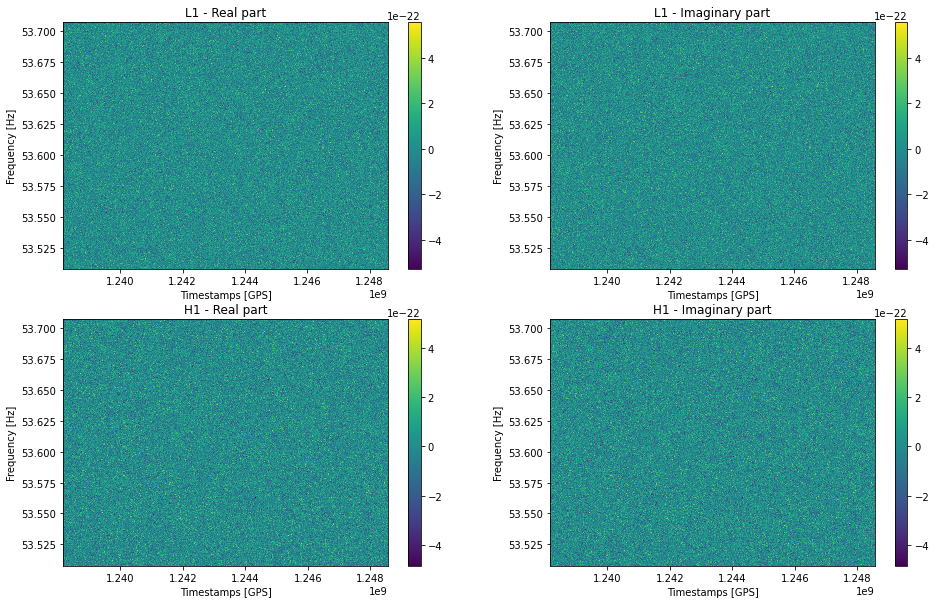

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
ids = '001121a05'
for d_ind, detector in enumerate(['L1', 'H1']):
    ax[d_ind][0].set(xlabel="Timestamps [GPS]",
                     ylabel="Frequency [Hz]",
                     title=f"{detector} - Real part"
    )
    ax[d_ind][1].set(xlabel="Timestamps [GPS]",
                     ylabel="Frequency [Hz]",
                     title=f"{detector} - Imaginary part"
    )    
    c0 = ax[d_ind][0].pcolormesh(
        data[ids][detector][1], data[ids]['freq'], data[ids][detector][0].real
    )
    c1 = ax[d_ind][1].pcolormesh(
        data[ids][detector][1], data[ids]['freq'], data[ids][detector][0].real
    )    
    fig.colorbar(c0, ax=ax[d_ind][0])
    fig.colorbar(c1, ax=ax[d_ind][1])
plt.show()

## Time gsp
>Время GPS (GPST) — это непрерывная шкала времени (без дополнительных секунд), определяемая сегментом управления GPS на основе набора атомных часов на станциях мониторинга и на борту спутников, начинается в 0 часов UTC (полночь) с 5 по 6 января 1980 года (6.d0), [link](https://gssc.esa.int/navipedia/index.php/Time_References_in_GNSS).


convert, https://www.andrews.edu/~tzs/timeconv/timedisplay.php

```
~Test dataset period: 1238170136 1248567118
Apr 01, 2019 - Jul 31, 2019	
```